# Lloyd-Max quantization

In [1]:
%%bash
if [ -d "$HOME/repos" ]; then
    echo "\"$HOME/repos\" exists"
else
    mkdir ~/repos
    echo Created $HOME/repos
fi

"/home/vruiz/repos" exists


In [2]:
%%bash
if [ -d "$HOME/repos/image_IO" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/image_IO ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/image_IO.git
fi

/home/vruiz/repos/image_IO ... 
Ya está actualizado.


In [ ]:
%%bash
if [ -d "$HOME/repos/information_theory" ]; then
    cd $HOME/repos/image_IO
    echo "$HOME/repos/information_theory ... "
    git pull 
else
    cd $HOME/repos
    git clone https://github.com/vicente-gonzalez-ruiz/information_theory.git
fi

In [17]:
!ln -sf ~/repos/image_IO/image_1.py .
!ln -sf ~/repos/image_IO/logging_config.py .
!ln -sf ~/repos/information_theory/distortion.py .
!ln -sf ~/repos/information_theory/information.py .

In [29]:
import LloydMax_quantization as quantization
import image_1 as gray_image
import os
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.utils import shuffle
import numpy as np
import distortion

In [43]:
home = os.environ["HOME"]
fn = home + "/repos/MRVC/images/lena_bw/"
#fn = home + "/repos/MRVC/images/circle/"
#fn = home + "/repos/MRVC/images/Hommer_bw/"
!ls -l {fn}

# Quantizer selection
quantizer = quantization.LloydMax_Quantizer

n_clusters = 4  # Number of bins
N_tries = 4  # Number of times K-means is run

#N_bins = range(2, 128, 1)
#N_bins = [2, 4, 8, 16, 32] #range(2, 128, 1)
N_bins = [8]

gray_image.write = gray_image.debug_write

total 148
-rw-r--r-- 1 vruiz vruiz 151199 feb 18  2022 000.png


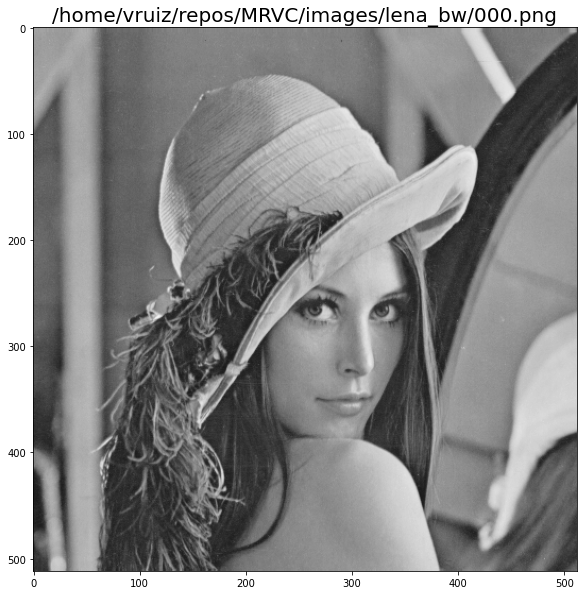

In [8]:
img = gray_image.read(fn, 0)
gray_image.show(img, fn + "000.png")

Quantization indexes: [0 1]
N_bins=  2, rate=0.341033935546875 bits/pixel, distortion=  26.3
Quantization indexes: [0 1 2 3]
N_bins=  4, rate=0.74383544921875 bits/pixel, distortion=  12.7
Quantization indexes: [0 1 2 3 4 5 6 7]
N_bins=  8, rate=1.479644775390625 bits/pixel, distortion=   6.5
Quantization indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
N_bins= 16, rate=2.781219482421875 bits/pixel, distortion=   3.4
Quantization indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
N_bins= 32, rate=4.690643310546875 bits/pixel, distortion=   1.8
Quantization indexes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
N_bins= 64, rate=6.296844482421875 bits/pixel, distortion=   1.1
Quantization indexes: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18 

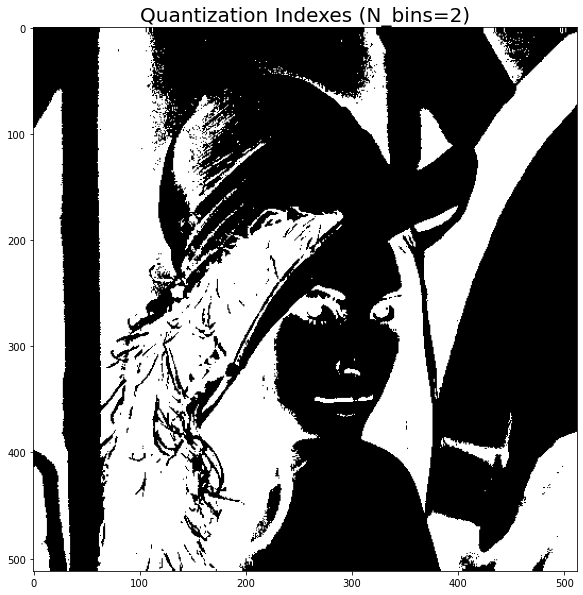

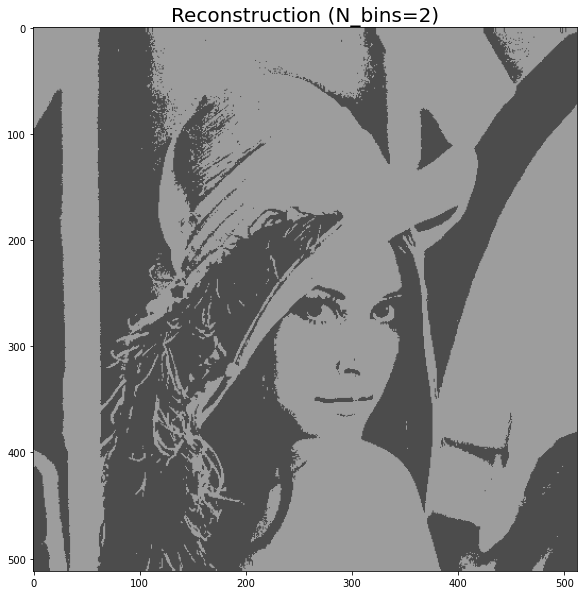

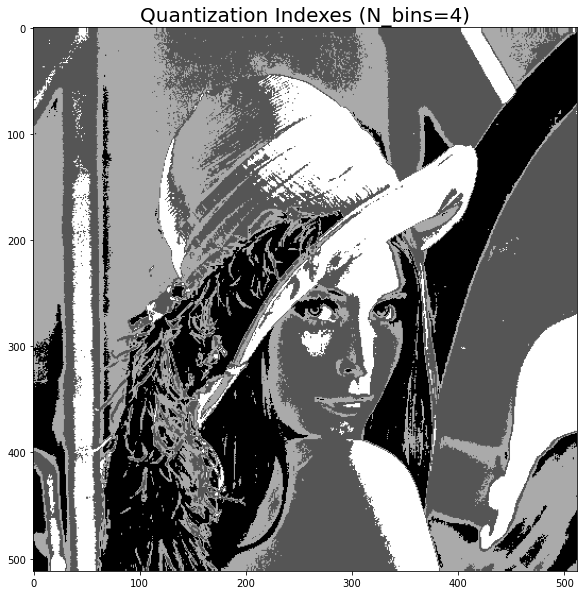

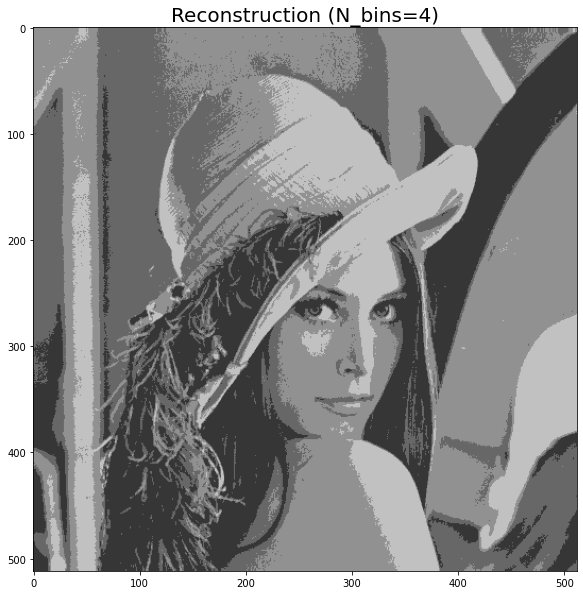

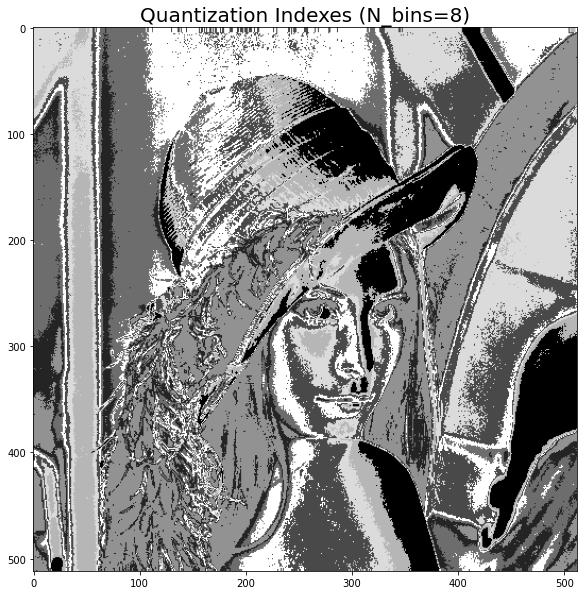

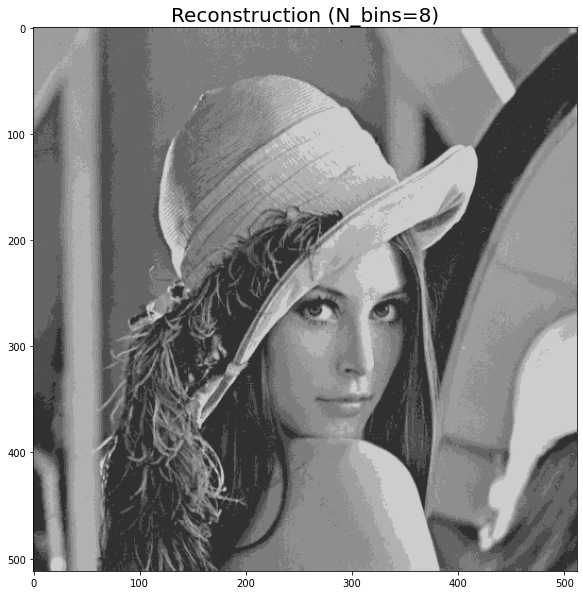

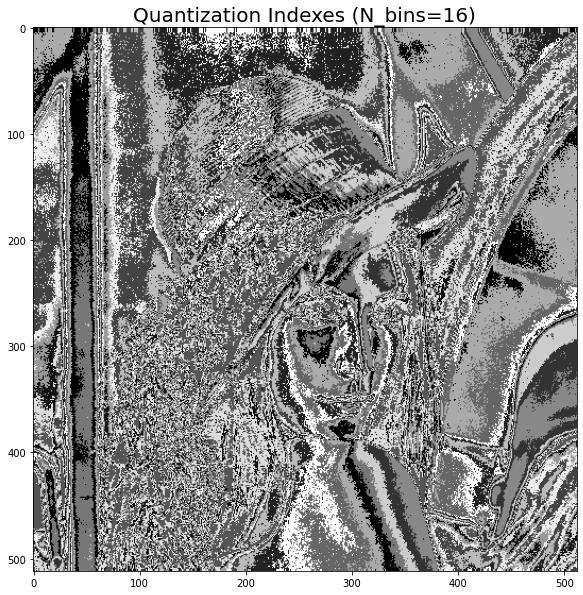

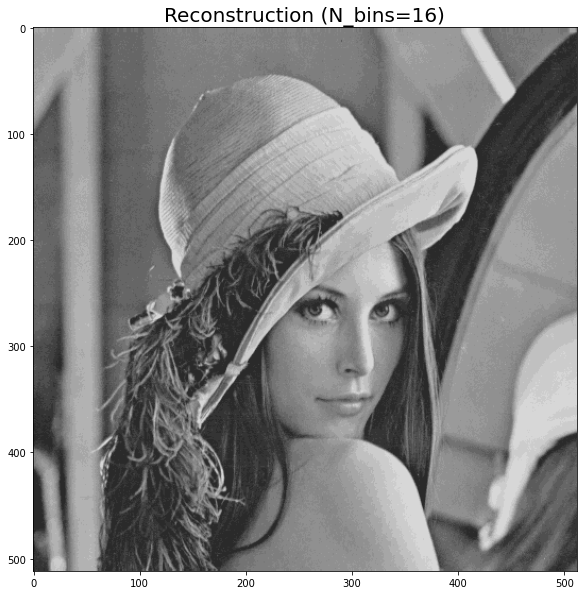

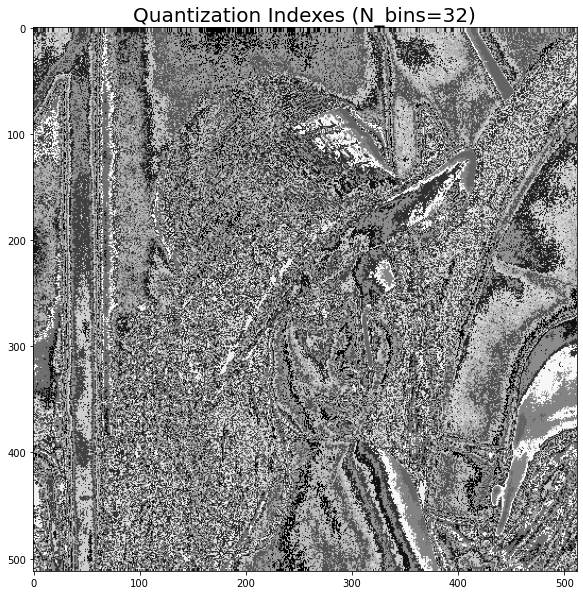

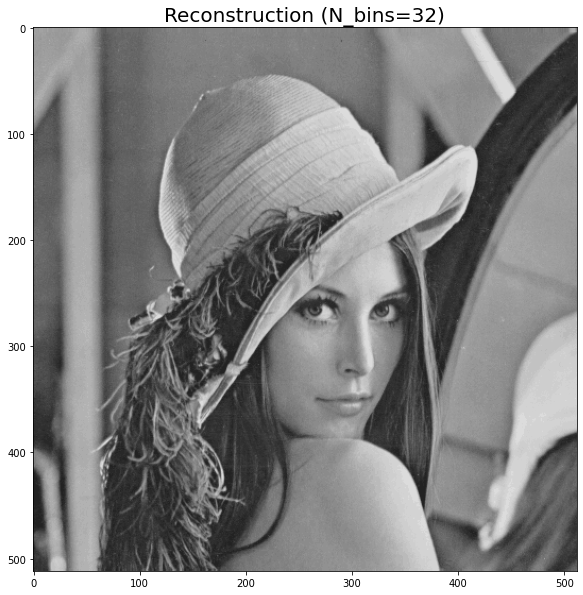

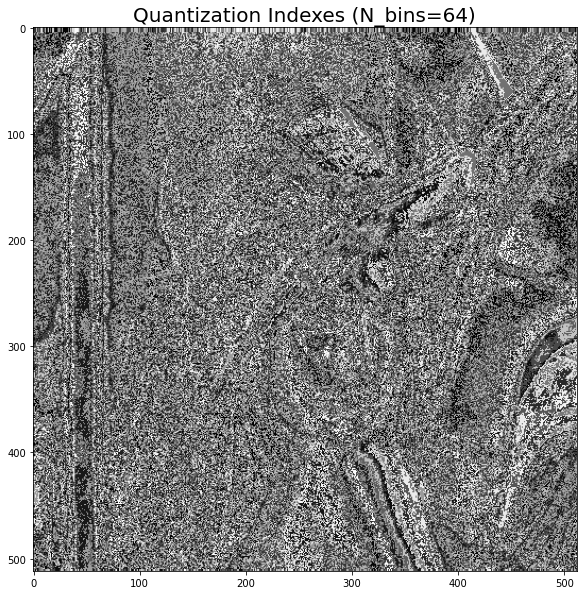

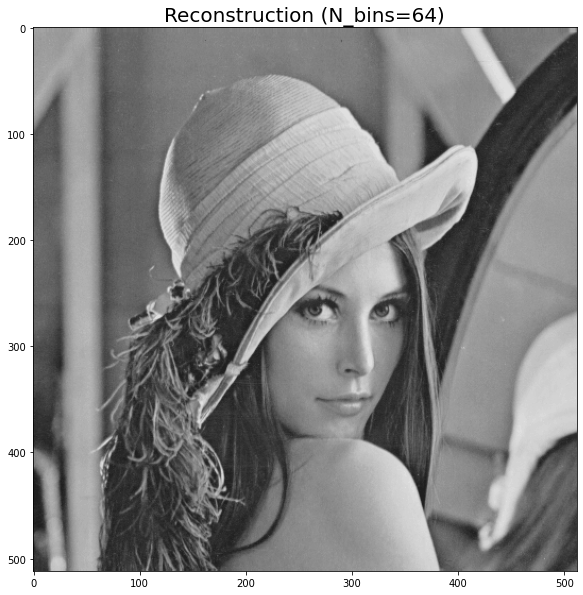

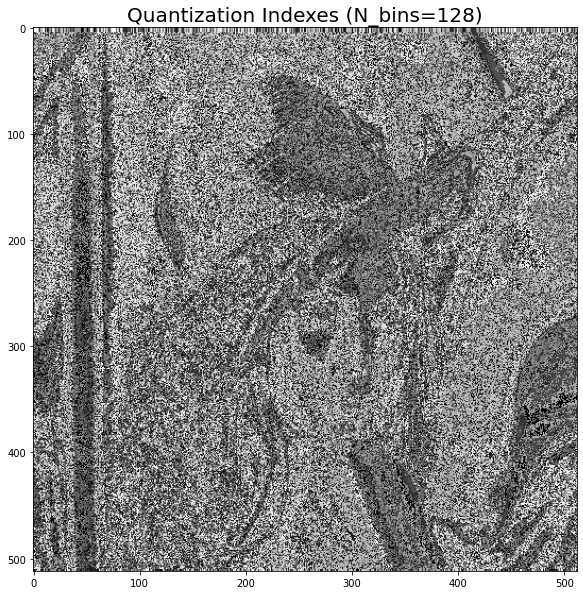

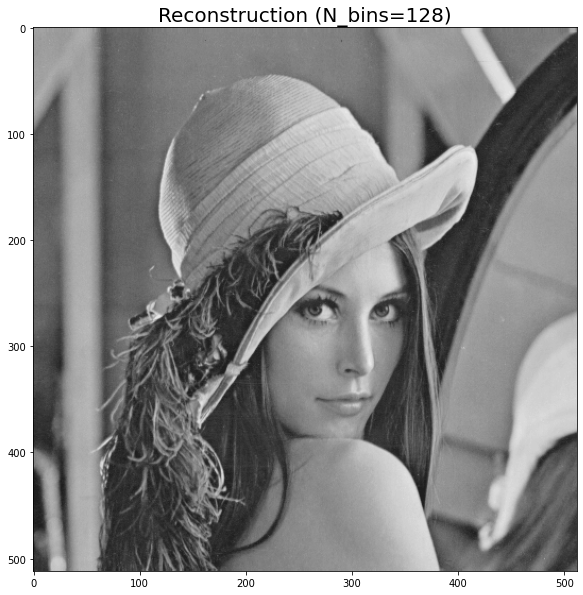

In [20]:
def quantize_using_kmeans(img, N_bins):
    points = []
    flatten_img = img.reshape((-1, 1))  # flatten
    for n in N_bins:
        k_means = KMeans(n_clusters=n)
        k_means.fit(flatten_img)
        centroids = k_means.cluster_centers_.squeeze().astype(np.uint8)  # Centroids
        k = k_means.labels_.astype(np.uint8)  # Labels of the centroids
        y = centroids[k]
        y.shape = img.shape
        k.shape = img.shape
        print("Quantization indexes:", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/(k.shape[0]*k.shape[1])
        with open("/tmp/representation_levels.uint8", mode="wb") as f:
            centroids.tofile(f)
        rate += (os.path.getsize("/tmp/representation_levels.uint8")*8/(k.shape[0]*k.shape[1]))
        #with gzip.GzipFile("/tmp/representation_levels.npy.gz", "w") as f:
        #    np.save(file=f, arr=centroids)
        #rate += (os.path.getsize("/tmp/representation_levels.npy.gz")*8/(k.shape[0]*k.shape[1]))
        _distortion = distortion.RMSE(img, y)
        #if n<16:
        #    plt.imshow(y, cmap=plt.cm.gray, vmin=0, vmax=256)
        #    plt.show()
        gray_image.show_normalized(k, f"Quantization Indexes (N_bins={n})")
        gray_image.show(y, f"Reconstruction (N_bins={n})")
        points.append((rate, _distortion))
        print(f"N_bins={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points
kmeans_quantization = quantize_using_kmeans(img, N_bins)

Input pixels: [ 28  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  68  69  70  71  72  73  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105
 106 107 108 109 110 111 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 184 185 187 188 189 190 192 193 194 195 196 197 198 199 200
 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 222 223 224 226 233]
[[190.]
 [100.]
 [143.]
 [ 70.]
 [ 47.]
 [125.]
 [159.]
 [210.]]
Quantization indexes: [0 1 2 3 4 5 6 7]
N_bins=  8, rate=1.493927001953125 bits/pixel, distortion=   6.7


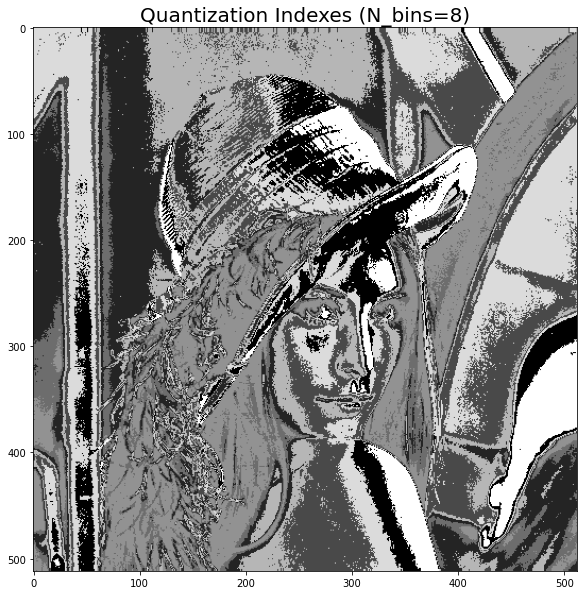

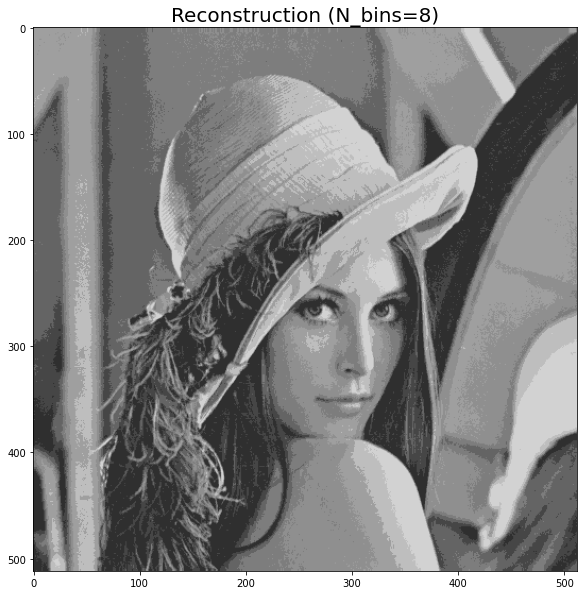

In [55]:
def quantize_using_kmedoids(img, N_bins):
    points = []
    flatten_img = img.reshape((-1, 1))  # flatten
    for n in N_bins:
        clusterer = KMedoids(init="k-medoids++", n_clusters=n)
        #clusterer = KMeans(n_clusters=n)
        image_array_sample = shuffle(flatten_img, random_state=0, n_samples=1_000)
        print("Input pixels:", np.unique(image_array_sample))
        clusterer.fit(image_array_sample)
        k = clusterer.predict(flatten_img)
        y = clusterer.cluster_centers_[k]
        centroids = clusterer.cluster_centers_
        print(centroids)
        k.shape = img.shape
        y.shape = img.shape
        print("Quantization indexes:", np.unique(k))
        rate = gray_image.write(k, "/tmp/" + str(n) + '_', 0)*8/(k.shape[0]*k.shape[1])
        with open("/tmp/representation_levels.uint8", mode="wb") as f:
            centroids.tofile(f)
        rate += (os.path.getsize("/tmp/representation_levels.uint8")*8/(k.shape[0]*k.shape[1]))
        _distortion = distortion.RMSE(img, y)
        gray_image.show_normalized(k, f"Quantization Indexes (N_bins={n})")
        gray_image.show(y, f"Reconstruction (N_bins={n})")
        points.append((rate, _distortion))
        print(f"N_bins={n:>3}, rate={rate:>7} bits/pixel, distortion={_distortion:>6.1f}")
    return points
kmedoids_quantization = quantize_using_kmedoids(img, N_bins)

(512, 512)
Fitting model on a small sub-sample of the data
done in 0.054s.
Predicting color indices on the full image (k-means)
done in 0.630s.
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]
Predicting color indices on the full image (random)
[ 28.  33.  35.  36.  37.  39.  41.  42.  43.  44.  45.  47.  49.  50.
  51.  52.  53.  55.  56.  57.  59.  62.  65.  66.  69.  70.  72.  76.
  78.  81.  84.  86.  88.  90.  92.  93.  95.  96.  97.  98.  99. 100.
 101. 102. 103. 104. 105. 106. 107. 110. 113. 115. 117. 118. 119. 120.

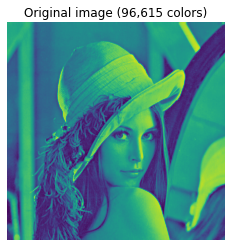

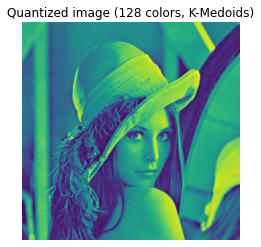

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 128

# Load the Summer Palace photo
china = img # load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) #/ 255
print(china.shape)
#china = (( china[...,0] + china[...,1] + china[...,0] ) / 3).astype(np.uint8)

# Load Image and transform to a 2D numpy array.
w, h = original_shape = tuple(china.shape)
image_array = np.reshape(china, w * h)

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000).reshape(-1, 1)
kmeans = KMedoids(init="k-medoids++", n_clusters=n_colors, random_state=0).fit(image_array_sample)
#kmeans = KMedoids(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array.reshape(-1, 1))
print(f"done in {time() - t0:0.3f}s.")
print(np.unique(labels))

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
#labels_random = pairwise_distances_argmin(codebook_random, image_array.reshape(-1, 1), axis=0)
#print(f"done in {time() - t0:0.3f}s.")


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Medoids)")
y = recreate_image(kmeans.cluster_centers_, labels, w, h)
print(np.unique(y))
plt.imshow(y)

#plt.figure(3)
#plt.clf()
#plt.axis("off")
#plt.title(f"Quantized image ({n_colors} colors, Random)")
#plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()
